# Investigate TMDb Database

## Navigation
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#eda1">Has the rating changed from movies released in 1960s to movies released in 2010s?</a></li>
        <li><a href="#eda2">How much did movie production increase over time?</a></li>
        <li><a href="#eda3">Has movie runtime changed throughout the decades?</a></li>
        <li><a href="#eda4">Does the more votes a movie receive indicate a higher average rating?</a></li>
    </ol>
    <br>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set contains information from about 10,000 movies collected from The Movie Database (TMDb). Releases are included from the 1960 to 2015. Additional columns are were added to adjust revenue & budget based on 2010 prices.

In this analysis, I'll look to answer questions related to:
1. How movie ratings and releases have changed between the decades
2. The relationship between the number of votes and higher ratings

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('tmdb-movies.csv')

In [4]:
# View initial dataframe datatypes and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# View initial head
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
# Check for Null Values
df.isnull().sum().any()

True

In [7]:
# Check for 0 Revenue Values and store in seperate dataframe
null_data = df[df.isnull().any(axis=1)]
null_data['revenue'].value_counts()

0            5470
12000000        9
10000000        8
6000000         6
11000000        6
5000000         6
2000000         5
13000000        5
30000000        5
14000000        5
20000000        5
4300000         4
25000000        4
7000000         3
4000000         3
50000000        3
15              3
100000000       3
1000000         3
16000000        3
3               3
11              3
102000000       3
6700000         3
21000000        3
16              3
60000000        2
35000000        2
967000          2
29000000        2
             ... 
12368234        1
25473093        1
494471524       1
25605015        1
10611160        1
31556061        1
42721196        1
38934048        1
161000000       1
8946237         1
26049082        1
50752337        1
7897645         1
13001257        1
137783840       1
65884703        1
44456478        1
346079773       1
39946780        1
2626800         1
525             1
272742922       1
23159305        1
4729352         1
41009669  

In [8]:
# Check data and datatype of release_date column
df.release_date

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
5        12/25/15
6         6/23/15
7         9/30/15
8         6/17/15
9          6/9/15
10       10/26/15
11         2/4/15
12        1/21/15
13        7/16/15
14        4/22/15
15       12/25/15
16         1/1/15
17        7/14/15
18        3/12/15
19       11/18/15
20        5/19/15
21        6/15/15
22        5/27/15
23        2/11/15
24       12/11/15
25        7/23/15
26        6/25/15
27        1/24/15
28        11/6/15
29         9/9/15
           ...   
10836      1/1/66
10837     6/21/66
10838     11/1/66
10839    10/27/66
10840    12/22/66
10841    10/23/66
10842      1/1/66
10843      6/9/66
10844     1/16/66
10845      3/1/66
10846      1/9/66
10847     6/20/66
10848     8/24/66
10849    12/16/66
10850     2/23/66
10851     6/22/66
10852     5/31/66
10853     3/29/66
10854     2/17/66
10855     1/20/66
10856     2/16/66
10857     6/10/66
10858     5/25/66
10859     10/5/66
10860     

### Cleaning - Remove Duplicates

In [9]:
# Check for duplicates
df_duplicates = df[df.duplicated(['id'], keep=False)]
df_duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
# Confirm 0 duplicates
df.duplicated().sum()

0

### Cleaning - Convert datatypes

In [12]:
# Print datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [13]:
# Convert Budget_adj to Int
df['budget_adj'] = df['budget_adj'].astype(int)
df['budget_adj']

0        137999939
1        137999939
2        101199955
3        183999919
4        174799923
5        124199945
6        142599937
7         99359956
8         68079970
9        160999929
10       225399900
11       161919931
12        13799993
13        80959964
14       257599886
15        40479982
16        44159980
17       119599947
18        87399961
19       147199935
20       174799923
21        27599987
22       101199955
23        36799983
24        25759988
25       137999939
26        62559972
27        74519967
28        18399991
29        56119975
           ...    
10836            0
10837            0
10838            0
10839            0
10840            0
10841       503851
10842            0
10843            0
10844            0
10845            0
10846            0
10847            0
10848     34362645
10849            0
10850            0
10851            0
10852            0
10853            0
10854            0
10855      4702610
10856            0
10857       

In [14]:
# Convert Revenue_adj to int
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['revenue_adj']

0        1392445892
1         348161292
2         271619025
3        1902723129
4        1385748801
5         490314247
6         405355075
7         547749654
8        1064192016
9         785411574
10        810220283
11        169268630
12         33919845
13        224146025
14       1292632336
15        143299244
16        299709578
17        477113780
18        498963025
19        598481289
20        192312729
21         84373003
22        432851374
23        524079119
24        122678731
25        627743451
26        198594430
27        371497801
28         81278719
29        286356245
            ...    
10836             0
10837             0
10838             0
10839             0
10840             0
10841             0
10842             0
10843             0
10844             0
10845             0
10846             0
10847             0
10848      80616176
10849             0
10850             0
10851             0
10852             0
10853             0
10854             0


In [15]:
# Change release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')


### Cleaning - Rename columns

In [16]:
# Rename 2010 budget and revenue columns
df.rename(columns={'budget_adj':'budget_2010','revenue_adj':'revenue_2010'}, inplace=True)

### Add additional columns Profit and Decade

In [17]:
# Calculate profit based on 2010 adjusted revenue/budget
df['profit'] = df['revenue_2010'] - df['budget_2010']
df['profit'] = df['profit'].astype(int)

In [18]:
# Bin years into decades
df['decades'] = pd.cut(x=df['release_year'], bins=[1960, 1969, 1979,1989,1999,2009,2015], labels=['1960s', '1970s', '1980s','1990s','2000s','2010s'])

In [19]:
# Confirm new columns
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,decades
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,2010s
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,210161353,2010s
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,170419070,2010s
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210,2010s
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1210948878,2010s
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,124199945,490314247,366114302,2010s
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,142599937,405355075,262755138,2010s
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,99359956,547749654,448389698,2010s
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,68079970,1064192016,996112046,2010s
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,160999929,785411574,624411645,2010s


### Create dataframes for financial analysis

In [20]:
# Query rows that have a revenue value more than 2 to avoid 0 datatypes
fdata = df.query('revenue_2010 != 0')

### Cleaning - Remove Data (Optional)

In [21]:
# Drop irrelevent columns if needed
# df.drop(['id','imdb_id','homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='eda1'></a>
### Research Question 1 - Has the rating changed from movies released in 1960s to movies released in 2010s?

In [72]:
# Function for plotting decade histograms
def plot_decade_hist(var1,var2, title, xlabel, ylabel):
    fig,ax = plt.subplots(1,1)
    xaxis = df.query('decades == @var1')[var2]
    ax.hist(xaxis, bins = [2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
    ax.set_title(title)
    ax.set_xticks([2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

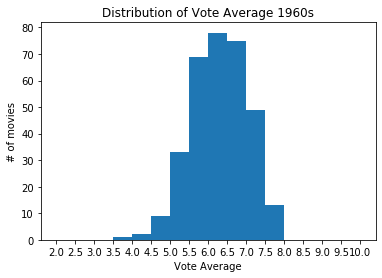

In [74]:
# Histogram to show distribution of vote averages 1960s
plot_decade_hist(var1 = "1960s", var2 = "vote_average", title = "Distribution of Vote Average 1960s", xlabel = "Vote Average", ylabel= '# of movies')

* Highest volume of ratings for 1960s is 6.0-6.5. Most movies have a rating between 5.5-7.5. Data is slightly skewed left.

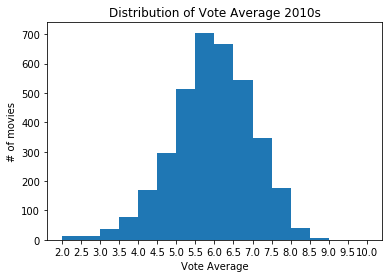

In [82]:
# Histogram to see vote_average distribution of the 2010s
plot_decade_hist(var1 = "2010s", var2 = "vote_average", title = "Distribution of Vote Average 2010s", xlabel = "Vote Average", ylabel= '# of movies')

* Highest volume of ratings for 2010s is 5.5-6.0. Most movies received a rating of between 5.0-7.0. Data is slightly skewed left.

<a id='eda2'></a>
### Research Question 2 - How much did movie production increase over time?

In [22]:
# Movies released each year
df.groupby('release_year').count()['original_title']

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

In [23]:
# Value counts of movie releases each decade
df['decades'].value_counts()

2010s    3605
2000s    3562
1990s    1765
1980s    1063
1970s     508
1960s     330
Name: decades, dtype: int64

In [24]:
# Create function to correctly calculate percent change for decades in sequential order
releases = [330,508,1063,1765,3562,3605]

for a, b in zip(releases[::1], releases[1::1]):
    print(100 * (b - a) / a)

53.93939393939394
109.25196850393701
66.03951081843839
101.81303116147309
1.2071869736103313


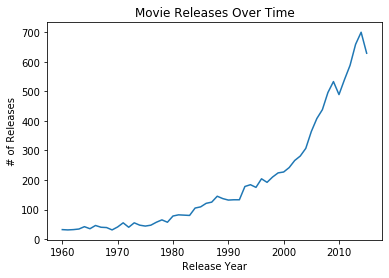

In [25]:
# Plot movie releases over time
plt.title('Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('# of Releases')
plt.plot(df.groupby('release_year').count()['original_title']);

* 330 movie releases in the 1960s to 3605 movie releases in the 2010s.
* The 1970s to the 1980s saw the biggest percentage increase of movie releases, with 109% increase decade/decade.
* Around the mid 90s, volume of movie releases increased significantly. Sharp upward trend starting around 2000 continuing to 2015 with only a slight dip in 2010.

<a id='eda3'></a>
### Research question 3 - Has movie runtime changed throughout the decades?

In [26]:
# Check average runtime by decade
df.groupby('decades').mean()['runtime']

decades
1960s    111.490909
1970s    107.799213
1980s    104.331138
1990s    106.619263
2000s    102.080573
2010s     97.424965
Name: runtime, dtype: float64

In [27]:
# Percent change each decade
df.groupby('decades').mean()['runtime'].pct_change().mean()*100

-2.6305729889087215

In [28]:
# Percent change 1960s > 2010s
a = pd.Series([111.49,97.42])
a.pct_change()*100

0          NaN
1   -12.619966
dtype: float64

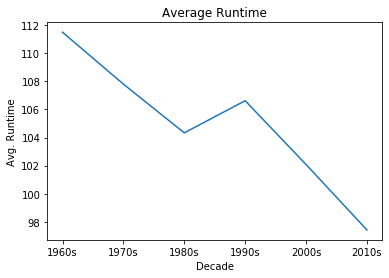

In [29]:
# Build line plot for average runtime
plt.title('Average Runtime')
plt.xlabel('Decade')
plt.ylabel('Avg. Runtime')
plt.plot(df.groupby('decades').mean()['runtime']);

* Average runtime in 1960s was 111 minutes. Average decline of 2.6% each decade. Average Runtime in 2010s is 97 minutes. This is a total decrease of 12.6% from 1960 - 2010s, about 14 minutes of runtime. 

<a id='eda4'></a>
### Research Question 4 - Does the more votes a movie receive indicate a higher average rating?

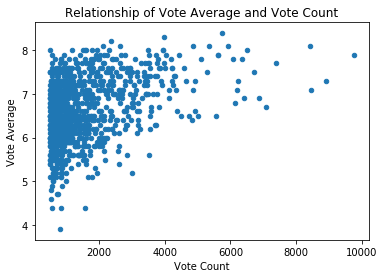

In [30]:
# Scatter plot for Vote Count and Vote Average with movies that have a minimum of 500 votes
a = df.query('vote_count >= 500')
a.plot(x='vote_count', y='vote_average', kind='scatter')
plt.title("Relationship of Vote Average and Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Vote Average");

* Positive correlation between View Count and Vote Average. Movies with the most votes also have the highest scores.
* All movies with more than 4000 votes have a rating of about 6.5 or higher.
* Most movies received under 2000 votes.

<a id='conclusions'></a>
## Conclusions

##### Of the movies analysed from the 1960s the highest amount of ratings is between 6.0-6.5. In the 2010s, the highest volume of ratings is at 5.5-6.0. The 2010s saw significantly more movies released which is provides much more data than the 1960s. The movies from the 1960s did not receive any ratings lower than 3.0, where the 2010s have ratings that go to the floor. In both decades, most movies range from a 5.5-6.5 average rating.

* *This dataset only includes votes from the TMDb website and does not always account for ratings around their release. Recent releases receive more votes possibly do to the amount of modern viewer's ability to vote online. The data includes 330 releases for the 1960s, where the 2010s includes 3605 releases.*


##### Movie production steadily increased from 1960 to 1990. In the mid to late 90s, movie production exploded and has continued to increase at a rapid rate with only a slight dip 2010. 

   ##### **2X** the number of movies were released in 2000s than in the 1990s. The most movies were released in 2014, with a count of 700.

##### Average movie runtime in the 1960s was 111 minutes, compared to 97 minutes in the 2010s. Decade over decade, average runtime decreased about 2.6%. In the past 60 years, total movie runtime has decreased by 12.6%. 

* *Though based on all movies in this dataset, it's likely more movies were released in each year. Noting this, I still believe this is an accurate representation of the overall trend of movie releases and their length over time.*

##### If we look at movies that received at least 500 votes, positive correlation can be seen between the number of votes and the vote average (rating). While there are many films that received 500 votes and have a large range of ratings, it can be seen by the chart above that the more votes a movie receives the higher the rating will be. All movies with more than 4000 votes have a rating of about 6.5 or higher. The top movies movies all received the highest number of votes.

* *Due to the volume of movies with under 2000 votes, rating data may be more accurate if additional sources are used, though I expect the relationship will remain unchanged. Positive correlation can be seen with no significant outliers.*